In [1]:
import re
import os 
import sys 

import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io

from pathlib import Path
from tqdm.notebook import trange, tqdm
from joblib import Parallel, delayed
from skimage import exposure
import h5py
import pandas as pd
import scanpy as sc
import squidpy as sq
sc.settings.verbosity = 3

from matplotlib.pyplot import rc_context
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from functools import reduce
from matplotlib import cm, colors
import scanorama
import seaborn as sns 
import anndata as ad
from PIL import Image
import openTSNE


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import path
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)
    
module_path = str(Path.cwd().parents[0] / "src")
if module_path not in sys.path:
    sys.path.append(module_path)
    

In [4]:
from config import *
import my_io as io

In [5]:
data_ROI = data_dir / 'ROI_new'

# Manual gating

In [6]:
adata_path = data_ROI  / f"processed_scanorama_subset.h5ad"
if os.path.exists(adata_path):
    adata = ad.read_h5ad(adata_path)
else:
    print("Expression file not found")

In [7]:
adata

AnnData object with n_obs × n_vars = 264191 × 14
    obs: 'Cell', 'ROI', 'leiden', 'clusters', 'cell type'
    uns: 'ROI_colors', 'cell type_colors', 'cell type_colors_colors', 'clusters_colors', 'dendrogram_cell type', 'dendrogram_clusters', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'neighbors', 'umap'
    obsm: 'X_scanorama', 'X_tsne', 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances'

In [8]:
df_cluster = sc.get.obs_df(adata, keys=['ROI', 'clusters'])
df_cluster_count = df_cluster.value_counts().to_frame('counts').reset_index()
df_cluster_count['Density'] = df_cluster_count.groupby('ROI')["counts"].apply(lambda x: x / x.sum())
df_cluster_count['Dataset'] = pd.Categorical(df_cluster_count['ROI'])

In [9]:
df_cluster_count.groupby('clusters')['counts'].sum()

clusters
0     34804
1     34546
2     31909
3     31157
4     26267
5     15911
6     15891
7     15043
8     14575
9     12487
10    12047
11    11102
12     8452
Name: counts, dtype: int64

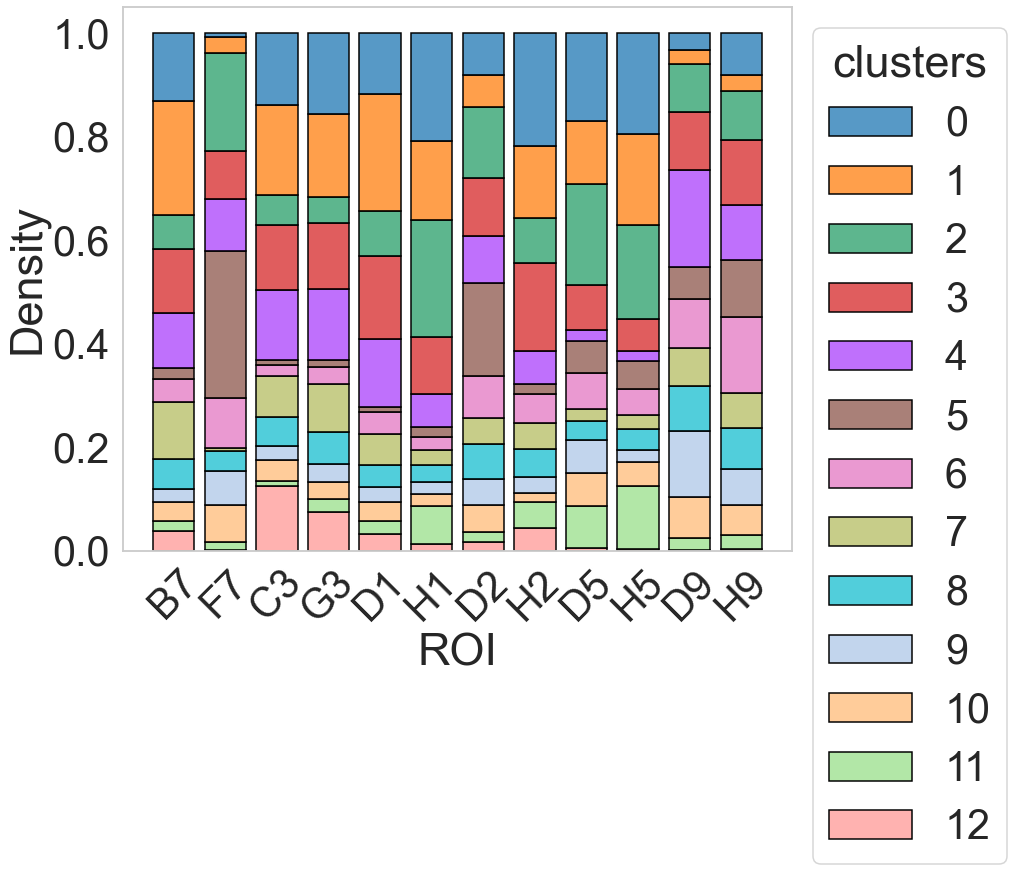

In [17]:
sns.set_style("whitegrid")
sns.set_context('talk', font_scale=2.5)
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.histplot(data=df_cluster_count, x='ROI' , hue='clusters', weights='Density',
             multiple='stack', shrink=0.8, palette=adata.uns['clusters_colors'].tolist(),
             edgecolor='black')
ax.set_ylabel('Density')
ax.tick_params(axis='x', rotation=45)
# Fix the legend so it's not on top of the bars.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))
ax.grid(False)